**Course website**: http://www.leouieda.com/matematica-especial

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Integração Numérica

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [5]:
# Dessa vez vamos precisar da biblioteca matemática "math"
# Ela define funções como sin, cos, tan, exp e constantes como pi
import math

## Regra dos retângulos

O jeito mais simples de integração numérica é a regra dos retângulos. Nela, aproximamos a integral pela soma das áreas de retângulos. Cada retângulo se encontra abaixo de um dos pontos dos dados. A largura do retângulo é o espaçamento entre os dados $\Delta$. A altura do retângulo é o valor do dado naquela posição $d_i$.

Se tivermos nossos dados em um vetor de dados $\bar{d}$ (**nota**: vetores serão representados com uma barra em cima):

$$
\bar{d} = \left[ d_1 ~ d_2 ~ d_3 ~ \ldots ~ d_N \right],
$$

a integral poderá ser aproximada pela soma das áreas dos retângulos:

$$
A = \sum\limits_{i=1}^{N} \Delta d_i
$$

### Algoritmo

Utilize a célula vazia abaixo (tipo Markdown) para colocar uma descrição do algoritmo em português (não em código). Não se esqueça de relacionar os passos do algoritmo com as fórmulas matemáticas do método.

**Dicas**:

* Help sobre Markdown: https://help.github.com/articles/markdown-basics/
* Como utilizar fórmulas matemáticas: https://www.sharelatex.com/learn/Mathematical_expressions


### Dados para teste

Vamos utilizar dados gerados a partir de uma função $d(t) = \cos(t)$ para testar o método de integração. A vantagem do cosseno é que sabemos quanto deve ser a integral:

$$
\int\limits_a^b \cos(t) dt = \sin(b) - \sin(a)
$$

O código abaixo gera duas listas: uma com os tempos variando entre os limites de integração; outra com os valores correspondentes do cosseno.

In [6]:
# inicio e fim são os intervalos de integração
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
N = 50
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
intervalo = (fim - inicio)/(N - 1)
print("Espaçamento entre os dados:", intervalo)
tempos = []
dados = []
for i in range(N):
    t = inicio + i*intervalo
    tempos.append(t)
    dados.append(math.cos(t))

('Espa\xc3\xa7amento entre os dados:', 0.0320570678937734)


Utilize a célula abaixo para gerar um gráfico de `dados` por `tempos`.

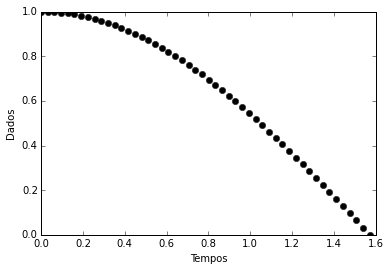

In [7]:
%matplotlib inline # comando que gera o gráfico no jupyter
import matplotlib.pyplot as plt #comando para importar a biblioteca para gerar a figura
plt.figure()#cria uma figura
plt.plot(tempos, dados, "ok") #determina quais são as variaveis que irão aparecer na figura e ok determina que o gráfico será de pontos pretos 
plt.xlabel('Tempos')#nomeia o eixo x
plt.ylabel('Dados')#nomeia o eixo y

In [8]:
integral = 0 #cria uma variavel
for valor in dados:#irá calcular a integral para cada valor e fazer o somatorio final
    integral = valor*intervalo + integral#calculo da integral, que é a área, ou seja a soma dos retangulos
print (integral)#imprime o valor final

1.01594289451


Nas células abaixo calcule e imprima:

1. A solução analítica (verdadeira) para a integral
2. O erro cometido $E = \left|res_{true} - res_{calc}\right|$

Dica: a função `abs` calcula o valor absoluto de um número.

In [9]:
import math #calculo do erro
analitico = math.sin(math.pi/2)- math.sin(0) #calcula o valor teorico
erro = abs(analitico - integral) # valor teorico menos o real
print(erro)#imprime o erro





0.0159428945133


**Responda na célula abaixo:** Por que o erro não é zero e quais são os fatores que influenciam o erro?

Ao calcular a integral por retângulos considera-se áreas sobressalentes dos mesmos, logo, o valor numérico fica maior do que o valor analítico. 


### Resultado esperado

No caso acima estamos integrando o cosseno de 0 a $\pi/2$, então o valor esperado da integral é 1. Seu resultado não será exatamente 1 mas deve estar entre 0.9 e 1.1.

## Regra dos trapézios

A regra dos trapézios é parecida com a regra dos retângulos. Mas utilizaremos a área de um trapézio ao invés da área de um retângulo. O trapézio será definido com base em dois pontos adjacentes nos dados ($d_i$ e $d_{i+1}$, por exemplo).

$$
A = \sum\limits_{i=1}^{N - 1} \Delta \frac{d_i + d_{i+1}}{2}
$$

### Algoritmo

Descreva abaixo o algoritmo utilizado (em português) para fazer a integração numérica utilizando a regra dos trapézios.

### Implementação

Vamos utilizar os mesmo dados utilizados na regra dos retângulos (na dúvida, rode novamente a célula que gera os dados). Abaixo, escreva e rode o código que faz a integração numérica com a regra dos trapézios. 

In [10]:
integral_t = 0 #processo semelhante ao de cima mas o calculo é feito para trapézios e não retângulos
N = len(dados)
for i in range (0, N - 1, 1):
    integral_t = intervalo*(dados[i] + dados[i + 1])/2 + integral_t
print(integral_t)


0.999914360566


Calcule e imprima também a solução analíca e o erro cometido.

In [11]:
import math#o processo de calculo do erro é o mesmo
analitico = math.sin(math.pi/2)- math.sin(0)
erro_t = abs(analitico - integral_t)
print(erro_t)

8.56394336369e-05


**Responda na célula abaixo:** O erro é maior ou menos que para a regra dos retângulos? Por que? Você esperava isso?

É menor. Porque as áreas antes consideradas, já não são mais contabilizadas e com isso o erro diminui. Sim pois esta era a intenção de se utilizar uma figura geométrica mais próxima à forma real.

### Resultado esperado

Novamente, o valos esperado é 1 mas seu resultado não será exatamente 1 (mas deve estar entre 0.9 e 1.1).

## Comparação dos dois métodos

Vamos comparar o erro de ambos métodos. Uma comparação muito utilizada em métodos numéricos em geral é como o erro varia com o número de dados (ou pontos) utilizados.

Nas células abaixo, calcule o erro da integração numérica para diferentes valores de `N`. Os valores de N deverão variar de 10 a 1000 de 10 em 10. Mantenha os intervalos de integração entre $0$ e $\pi/2$. Faça esse cálculo para os dois métodos: retângulos e trapézios.

Ao final, faça um gráfico do erro pelos valores de `N`. O gráfico deverá ter duas curvas, uma para cada método. O eixo y (erros) deverá estar em escala logarítmica.

**Dicas**: 

* Gere uma lista dos valores de `N`.
* Para colocar o eixo y em escala log: `plt.yscale('log')`

In [63]:
lista = [] #cria uma nova lista, q cada valor será uma quantidades de pontos
for valor in range(10, 1000, 10): #a lista terá valores de 10 em 10 e terá 99 elementos
    lista.append(valor)
print(lista)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]


In [72]:
N = len(lista)#numero de compornentes na lista
intervalo = (fim - inicio)/(N - 1) #intervalo entre os pontos
print(intervalo)

0.0160285339469


In [107]:
retangulos = []
trapezios = []
for valor in lista: #calculo do intervalo para cada numero de pontos/ e todos os outros valores são obtidos dentro deste loop
    intervalo = (fim - inicio)/(valor - 1)
    Dados = [] #para valer sempre 0 quando se faz um novo calculo, e não somar com o anterior
    for i in range(valor):#obtenção de um novo valor para a lista dados, para cada intervalo
        t = inicio + i*intervalo
        Dados.append(math.cos(t))#acrescenta valores na lista Dados
    integral_r = 0 #para valer sempre 0 quando se faz um novo calculo, e não somar com o anterior
    for j in Dados: #valor da integral para caqda elemnto de Dados
        integral_r = j*intervalo + integral_r #calculo da integral, que é a área, ou seja a soma dos retangulos
    retangulos.append(integral_r)#acrescenta valores na lista retangulos
    integral_tr = 0 #para valer sempre 0 quando se faz um novo calculo, e não somar com o anterior
    for j in range(0, valor - 1, 1):#calculo da integral, que é a área, ou seja a soma dos trapezios
        integral_tr = intervalo*(Dados[j] + Dados[j + 1])/2 + integral_tr
    trapezios.append(integral_tr)#acrescenta valores na lista trapézios
print(trapezios) 
print (retangulos)

[0.9974602317917262, 0.9994303595982759, 0.9997554972492992, 0.9998648110993812, 0.9999143605663631, 0.9999409310004358, 0.9999568119020372, 0.9999670536591537, 0.9999740414308974, 0.999979020750832, 0.999982693588919, 0.9999854800257423, 0.9999876439356719, 0.9999893578388284, 0.9999907383838921, 0.9999918667341947, 0.9999928007753789, 0.999993582690233, 0.9999942438063029, 0.9999948077833422, 0.9999952927599657, 0.9999957128305357, 0.9999960790808794, 0.9999964003272636, 0.9999966836519615, 0.9999969347969708, 0.999997158457246, 0.9999973585017281, 0.9999975381417898, 0.9999977000609289, 0.9999978465155692, 0.999997979414103, 0.9999981003793714, 0.9999982107984449, 0.9999983118625644, 0.9999984045994057, 0.9999984898993073, 0.999998568536719, 0.9999986411878441, 0.999998708445226, 0.9999987708298677, 0.9999988288013486, 0.9999988827663163, 0.9999989330856416, 0.9999989800804546, 0.9999990240372962, 0.9999990652124845, 0.9999991038358655, 0.9999991401140264, 0.9999991742330654, 0.9999

In [91]:
import math# erro para cada valor da lista retangulos
analitico = math.sin(math.pi/2)- math.sin(0)
erro_r = []
for valor in retangulos:
    erros = abs(analitico - valor)
    erro_r.append(erros)
print(erro_r)


[0.0847266943914422, 0.040767105040247165, 0.026838192538866323, 0.02000322554546985, 0.01594289451325004, 0.013252764278358642, 0.011339393980260404, 0.009908802562918373, 0.00879873989603741, 0.007912335532624493, 0.007188181326510001, 0.006585464592106627, 0.006076001791466723, 0.00563970433809069, 0.005261866997297915, 0.004931477824744235, 0.004640127186015031, 0.00438128192709053, 0.004149789644384283, 0.003941532222525579, 0.0037531787092359714, 0.0035820058140862976, 0.003425765383925139, 0.0032825851113535975, 0.0031508931435173526, 0.00302936013827404, 0.002916854231957755, 0.002812405682363739, 0.0027151788455863635, 0.002624449771287507, 0.0025395881446874657, 0.0024600426222460836, 0.0023853288395463412, 0.0023150195400292173, 0.0022487363995207232, 0.002186143216111436, 0.0021269402066168563, 0.002070859205313136, 0.00201765960274769, 0.0019671248948447406, 0.0019190597379299401, 0.0018732874252085363, 0.001829647715960725, 0.001787994961260475, 0.001748196480003017, 0.00

In [108]:
import math#erro para cada valor da lista trapezios
analitico = math.sin(math.pi/2)- math.sin(0)
erro_tr = []
for valor in trapezios:
    erro_t = abs(analitico - valor)
    erro_tr.append(erro_t)
print(erro_tr)

[0.0025397682082738404, 0.0005696404017241363, 0.0002445027507007591, 0.00013518890061881006, 8.563943363693038e-05, 5.906899956420464e-05, 4.318809796277634e-05, 3.294634084627379e-05, 2.5958569102590978e-05, 2.0979249167996095e-05, 1.7306411080997286e-05, 1.451997425772067e-05, 1.2356064328145067e-05, 1.0642161171636744e-05, 9.261616107925086e-06, 8.133265805287948e-06, 7.199224621112776e-06, 6.417309767026147e-06, 5.756193697137313e-06, 5.1922166578455275e-06, 4.707240034318438e-06, 4.287169464323171e-06, 3.92091912060355e-06, 3.599672736442905e-06, 3.31634803851788e-06, 3.0652030291733467e-06, 2.841542753984072e-06, 2.6414982718936386e-06, 2.4618582101787467e-06, 2.2999390710820578e-06, 2.1534844307780077e-06, 2.020585897044569e-06, 1.8996206285759598e-06, 1.7892015551357332e-06, 1.6881374356181311e-06, 1.5954005943008553e-06, 1.510100692714289e-06, 1.4314632810208394e-06, 1.3588121559049426e-06, 1.291554774018877e-06, 1.2291701323441373e-06, 1.1711986513951445e-06, 1.1172336836784

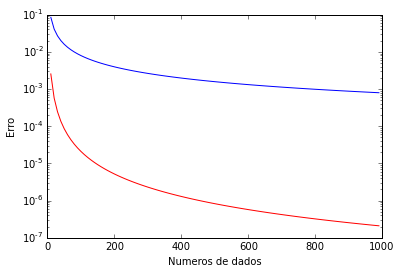

In [109]:
%matplotlib inline #cria a figura no jupyter
import matplotlib.pyplot as plt#importa a biblioteca para criação da figura
plt.figure() #cria uma figura
plt.plot(lista, erro_r, "-b" )#importa os dados para o grafico, em forma de linha azul
plt.plot(lista, erro_tr, "-r")#importa os dados para o grafico, em forma de linha vermelha
plt.xlabel('Numeros de dados')#nomeia o eixo x
plt.ylabel('Erro') #nomeia o eixo y
plt.yscale('log')#determina que os valores do eixo y estejam em escala logaritimica

### Resultado esperado

O gráfico ao final deverá ser parecido com:

![images/erro-por-ndados.png](images/erro-por-ndados.png)

## Tarefa bônus: Probabilidades

Vamos assumir que uma variável aleatória $x$ segue uma [distribuição normal](https://en.wikipedia.org/wiki/Normal_distribution) com média zero e desvio padrão $\sigma$. Isso quer dizer que a [densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function) para $x$ é

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{x^2}{2 \sigma^2} \right)
$$

A probabilidade de $x$ cair no intervalo $[a, b]$ é dada por ([refência](https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution)):

$$
P(a \leq x \leq b) = \int\limits_a^b f(x) dx
$$

Calcule na célula abaixo qual é a probabilidade de $x$ estar entre $[-\sigma, +\sigma]$ para $\sigma = 5$.